# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [58]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [14]:
spaceship.shape

(8693, 14)

**Check for data types**

In [15]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [16]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [17]:
spaceship_clean = spaceship.dropna()
spaceship_clean.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
spaceship_clean.shape

(6606, 14)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [27]:
spaceship_clean['Cabin'] = spaceship_clean['Cabin'].apply(lambda x: x[0])
spaceship_clean['Cabin'].head()

/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_31403/1353622884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Cabin'] = spaceship_clean['Cabin'].apply(lambda x: x[0])


0    B
1    F
2    A
3    A
4    F
Name: Cabin, dtype: object

In [19]:
spaceship_clean.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- Drop PassengerId and Name

In [20]:
spaceship_clean.drop(['PassengerId', 'Name'], axis=1, inplace=True)


/var/folders/1s/nkvzrw3d6r521f8yf637c8yh0000gn/T/ipykernel_31403/1653218822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean.drop(['PassengerId', 'Name'], axis=1, inplace=True)


In [25]:
spaceship_clean.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


- For non-numerical columns, do dummies.

In [29]:
# Identifiez toutes les colonnes non numériques.
cols_to_dummy = spaceship_clean.select_dtypes(exclude=[np.number]).columns

# Créez des variables muettes pour les colonnes non numériques, en supprimant la première colonne muette pour éviter les problèmes de multicollinéarité.
spaceship_dummies = pd.get_dummies(spaceship_clean, columns=cols_to_dummy, drop_first=True)

# Maintenant, df_dummies contient le DataFrame avec des variables muettes pour toutes les colonnes catégorielles.
print(spaceship_dummies.head())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0  39.0          0.0        0.0           0.0     0.0     0.0   
1  24.0        109.0        9.0          25.0   549.0    44.0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0   
4  16.0        303.0       70.0         151.0   565.0     2.0   

   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  Cabin_B  Cabin_C  \
0               True            False           False     True    False   
1              False            False           False    False    False   
2               True            False           False    False    False   
3               True            False           False    False    False   
4              False            False           False    False    False   

   Cabin_D  Cabin_E  Cabin_F  Cabin_G  Cabin_T  Destination_PSO J318.5-22  \
0    False    False    False    False    False                      False   
1   

In [37]:
spaceship_dummies.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.0,True,False,False,True,False,False,False,False,False,False,False,True,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,False,False,False,False,False,False,True,False,False,False,True,False,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,False,False,False,False,False,False,False,False,False,False,True,True,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,False,False,False,False,False,False,True,False,False,False,True,False,True


**Perform Train Test Split**

In [30]:
# Supposons que 'target' est le nom de votre colonne cible que vous essayez de prédire.
# Assurez-vous que cette colonne n'est pas incluse dans les colonnes utilisées pour le train-test split
X = spaceship_dummies.drop('Transported_True', axis=1)  # Toutes les colonnes sauf la cible
y = spaceship_dummies['Transported_True']  # La colonne cible


In [33]:
# Séparation en ensemble d'entraînement et de test
# test_size=0.2 signifie que 20% des données vont au test set, tandis que le reste va au training set
# random_state permet de reproduire les scénarios en fixant le générateur de nombres aléatoires
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Affichage des dimensions pour vérification
print('X_train dimensions:', X_train.shape)
print('X_test dimensions:', X_test.shape)
print('y_train dimensions:', y_train.shape)
print('y_test dimensions:', y_test.shape)

X_train dimensions: (5284, 19)
X_test dimensions: (1322, 19)
y_train dimensions: (5284,)
y_test dimensions: (1322,)


In [34]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
7832,25.0,0.0,1673.0,0.0,642.0,612.0,True,False,False,False,False,False,False,False,False,False,False,False,False
5842,36.0,0.0,2624.0,1657.0,2799.0,1.0,True,False,False,False,True,False,False,False,False,False,False,True,False
3928,34.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False,False,False,False,True,False,False,False,False,False
4091,37.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,False,True,False,False,False,False
7679,22.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,False,True,False,True,False,False


In [35]:
y_train.head()

7832    False
5842    False
3928     True
4091     True
7679     True
Name: Transported_True, dtype: bool

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Formation du modèle sur les données d'entraînement
model = LogisticRegression()  # Création d'une instance du modèle
model.fit(X_train, y_train)  # Formation du modèle

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul et affichage de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

Précision du modèle : 0.78


/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to conv

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
normalizer = MinMaxScaler()

In [41]:
normalizer.fit(X_train)

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MinMaxScaler()

In [42]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and wil

In [43]:
X_train_norm

array([[3.16455696e-01, 0.00000000e+00, 5.61164593e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.55696203e-01, 0.00000000e+00, 8.80152953e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.30379747e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.16455696e-01, 0.00000000e+00, 3.85737765e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.06329114e-01, 0.00000000e+00, 7.04390702e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.41772152e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [44]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.316456,0.0,0.056116,0.000000,0.028650,0.030094,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.455696,0.0,0.088015,0.135232,0.124911,0.000049,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.430380,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.468354,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.278481,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [45]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.367089,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.164557,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.632911,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.075949,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.468354,0.024458,0.000101,0.049049,0.000045,0.003344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


- Evaluate your model's performance. Comment it

In [64]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=10)

In [66]:
knn.fit(X_train_norm, y_train)

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier(n_neighbors=10)

In [67]:
knn.score(X_test_norm, y_test)

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7700453857791225

In [86]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, pred), recall_score(y_test, pred)

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

(0.8046744574290484, 0.7204783258594918)

In [76]:
X_test_norm

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.367089,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.164557,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.632911,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.075949,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.468354,0.024458,0.000101,0.049049,0.000045,0.003344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.050633,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1318,0.291139,0.000000,0.005669,0.000000,0.024679,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1319,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1320,0.405063,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
pred = knn.predict(X_test_norm.values)
pred = pred.astype(int)
pred

/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 1, 0])

In [72]:
y_test

8441     True
8058     True
320      True
2548    False
8027    False
        ...  
7668     True
1697    False
546      True
4895     True
875      True
Name: Transported_True, Length: 1322, dtype: bool

In [83]:
y_test= y_test.astype(int)

In [79]:
pred.astype(int)

array([1, 1, 0, ..., 1, 1, 0])

In [84]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, pred)
RMSE = mean_squared_error(y_test, pred, squared=False)

print(MSE)
print(RMSE)

0.22995461422087746
0.47953583205103395


/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/stephaniepragassam/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

In [85]:
from sklearn.metrics import confusion_matrix
import plotly.express as px 

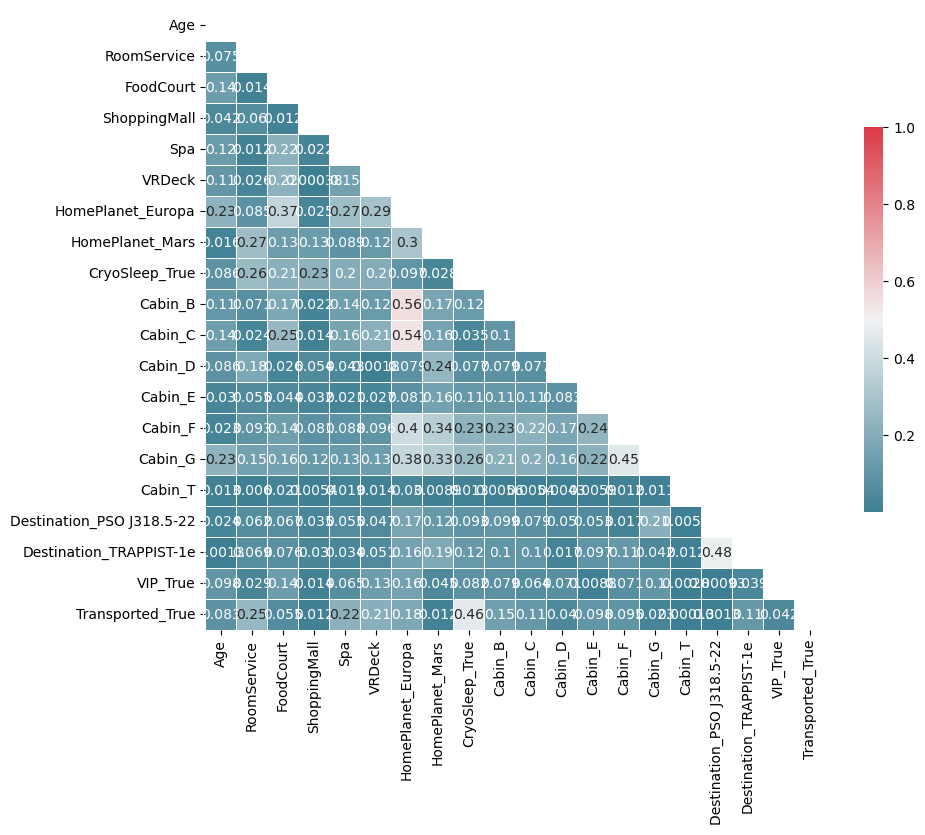

In [87]:
corr=np.abs(spaceship_dummies.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, annot = corr)

plt.show()

How to interprete the number and the map ? 